In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('churn.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RowNumber             10000 non-null  int64  
 1   CustomerId            10000 non-null  int64  
 2   Surname               9914 non-null   object 
 3   CreditScore           9963 non-null   float64
 4   Geography             9963 non-null   object 
 5   Gender                9963 non-null   object 
 6   Sex                   9805 non-null   float64
 7   Age                   9963 non-null   float64
 8   CurrentWorkingStatus  9963 non-null   float64
 9   Tenure                9963 non-null   float64
 10  Balance               9963 non-null   float64
 11  NumOfProducts         9859 non-null   float64
 12  ComplaintsLodged      9963 non-null   float64
 13  HasCrCard             9963 non-null   float64
 14  IsActiveMember        9963 non-null   float64
 15  EstimatedSalary     

In [3]:
df.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Sex   Age  \
0          1    15634602  Hargrave        619.0    France  Female  1.0  42.0   
1          2    15647311      Hill        608.0     Spain  Female  1.0  41.0   
2          3    15619304      Onio        502.0    France  Female  1.0  42.0   
3          4    15701354      Boni        699.0    France  Female  1.0  39.0   
4          5    15737888  Mitchell        850.0     Spain  Female  1.0  43.0   
5          6    15574012       Chu        645.0     Spain    Male  0.0  44.0   
6          7    15592531  Bartlett        822.0    France    Male  0.0  -1.0   
7          8    15656148    Obinna        376.0   Germany  Female  1.0  29.0   
8          9    15792365        He        501.0    France    Male  0.0  44.0   
9         10    15592389        H?        684.0    France    Male  0.0  27.0   

   CurrentWorkingStatus  Tenure    Balance  NumOfProducts  ComplaintsLodged  \
0                   1.0     2.0       0.00            1.0               1.0   
1                   1.0     1.0   83807.86            1.0               0.0   
2                   1.0     8.0  159660.80            3.0               1.0   
3                   1.0     1.0       0.00            2.0               0.0   
4                   1.0     2.0  125510.82            1.0               0.0   
5                   1.0     8.0  113755.78            2.0               1.0   
6                   1.0     7.0       0.00            2.0               0.0   
7                   1.0     4.0  115046.74            4.0               1.0   
8                   1.0     4.0  142051.07            2.0               0.0   
9                   1.0     2.0  134603.88            1.0               0.0   

   HasCrCard  IsActiveMember EstimatedSalary Exited  
0        1.0             1.0       101348.88    Yes  
1        0.0             1.0       112542.58     No  
2        1.0             0.0       113931.57    Yes  
3        0.0             0.0               ?     No  
4        1.0             1.0         79084.1     No  
5        1.0             0.0       149756.71    Yes  
6        1.0             1.0         10062.8     No  
7        1.0             0.0       119346.88    Yes  
8        0.0             1.0         74940.5     No  
9        1.0             1.0        71725.73     No

In [4]:
(df['Exited'].value_counts()/df['Exited'].count())*100

No     79.63
Yes    20.37
Name: Exited, dtype: float64

In [5]:
df = df.replace({ "?": np.nan})

In [6]:
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)


In [7]:
df.isnull().sum()

RowNumber                 0
CustomerId                0
Surname                  86
CreditScore              37
Geography                37
Gender                   37
Sex                     195
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         168
Exited                    0
dtype: int64

Task 1: 
Question 1
what is the proportion of customers who exited and stopped using the banking services?

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname','Sex'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

CreditScore              37
Geography                37
Gender                   37
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         168
Exited                    0
dtype: int64

In [10]:
df.head(10)

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
0        619.0    France  Female  42.0                   1.0     2.0   
1        608.0     Spain  Female  41.0                   1.0     1.0   
2        502.0    France  Female  42.0                   1.0     8.0   
3        699.0    France  Female  39.0                   1.0     1.0   
4        850.0     Spain  Female  43.0                   1.0     2.0   
5        645.0     Spain    Male  44.0                   1.0     8.0   
6        822.0    France    Male  -1.0                   1.0     7.0   
7        376.0   Germany  Female  29.0                   1.0     4.0   
8        501.0    France    Male  44.0                   1.0     4.0   
9        684.0    France    Male  27.0                   1.0     2.0   

     Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0       0.00            1.0               1.0        1.0             1.0   
1   83807.86            1.0               0.0        0.0             1.0   
2  159660.80            3.0               1.0        1.0             0.0   
3       0.00            2.0               0.0        0.0             0.0   
4  125510.82            1.0               0.0        1.0             1.0   
5  113755.78            2.0               1.0        1.0             0.0   
6       0.00            2.0               0.0        1.0             1.0   
7  115046.74            4.0               1.0        1.0             0.0   
8  142051.07            2.0               0.0        0.0             1.0   
9  134603.88            1.0               0.0        1.0             1.0   

   EstimatedSalary Exited  
0        101348.88    Yes  
1        112542.58     No  
2        113931.57    Yes  
3              NaN     No  
4         79084.10     No  
5        149756.71    Yes  
6         10062.80     No  
7        119346.88    Yes  
8         74940.50     No  
9         71725.73     No

In [11]:
df['Age'].unique()

array([42., 41., 39., 43., 44., -1., 29., 27., 31., 24., 34., 25., 45.,
       58., 32., nan, 33., 36., 40., 51., 61., 49., 38., 37., 19., 66.,
       35., 56., 26., 21., 55., 46., 75., 22., 30., 28., 65., 48., 52.,
       50., 57., 73., 47., 54., 72., 20., 67., 79., 62., 53., 80., 59.,
       68., 23., 60., 70., 63., 64., 18., 82., 69., 74., 71., 76., 77.,
       88., 85., 84., 78., 81., 92., 83.])

In [12]:
print(df.apply(lambda col: col.unique()))

ValueError: arrays must all be same length

In [14]:
print(df.apply(lambda col: col.describe()))

        CreditScore Geography Gender          Age  CurrentWorkingStatus  \
25%      584.000000       NaN    NaN    32.000000              1.000000   
50%      652.000000       NaN    NaN    37.000000              1.000000   
75%      718.000000       NaN    NaN    44.000000              1.000000   
count   9963.000000      9963   9963  9963.000000           9963.000000   
freq            NaN      4963   5439          NaN                   NaN   
max      850.000000       NaN    NaN    92.000000              1.000000   
mean     650.624812       NaN    NaN    38.898223              0.996587   
min      350.000000       NaN    NaN    -1.000000              0.000000   
std       96.606044       NaN    NaN    10.541477              0.058321   
top             NaN    France   Male          NaN                   NaN   
unique          NaN         6      2          NaN                   NaN   

             Tenure        Balance  NumOfProducts  ComplaintsLodged  \
25%        3.000000       0.

Task 1: Question 3: Did you have to fix any data quality problems? Detail them. Apply the imputation methods to the variables that need it. List the variables that needed it. justify your choice of imputation if needed

In [13]:
#first step is to check null values and see how to deal with them
df.isnull().sum()

CreditScore              37
Geography                37
Gender                   37
Age                      37
CurrentWorkingStatus     37
Tenure                   37
Balance                  37
NumOfProducts           141
ComplaintsLodged         37
HasCrCard                37
IsActiveMember           37
EstimatedSalary         168
Exited                    0
dtype: int64

In [15]:
df[ df.iloc[ :,:].isnull().sum(axis=1) >=12]

CreditScore Geography Gender  Age  CurrentWorkingStatus  Tenure  Balance  \
22           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
23           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
24           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
25           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
26           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
27           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
28           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
29           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
30           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
31           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
32           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
33           NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
345          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
346          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
347          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
348          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
349          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
350          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
351          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
352          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
353          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
427          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
428          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
429          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
430          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
431          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
432          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
433          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
434          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
435          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
436          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
437          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
438          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
439          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
440          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
441          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   
442          NaN       NaN    NaN  NaN                   NaN     NaN      NaN   

     NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
22             NaN               NaN        NaN             NaN   
23             NaN               NaN        NaN             NaN   
24             NaN               NaN        NaN             NaN   
25             NaN               NaN        NaN             NaN   
26             NaN               NaN        NaN             NaN   
27             NaN               NaN        NaN             NaN   
28             NaN               NaN        NaN             NaN   
29             NaN               NaN        NaN             NaN   
30             NaN               NaN        NaN             NaN   
31             NaN               NaN        NaN             NaN   
32             NaN               NaN        NaN             NaN   
33             NaN               NaN        NaN             NaN   
345            NaN               NaN        NaN        

In [16]:
Y= df['Exited']
Y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
9995     No
9996     No
9997    Yes
9998    Yes
9999     No
Name: Exited, Length: 10000, dtype: object

In [17]:
df

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
0           619.0    France  Female  42.0                   1.0     2.0   
1           608.0     Spain  Female  41.0                   1.0     1.0   
2           502.0    France  Female  42.0                   1.0     8.0   
3           699.0    France  Female  39.0                   1.0     1.0   
4           850.0     Spain  Female  43.0                   1.0     2.0   
...           ...       ...     ...   ...                   ...     ...   
9995        771.0    France    Male  39.0                   1.0     5.0   
9996        516.0    France    Male  35.0                   1.0    10.0   
9997        709.0    France  Female  36.0                   1.0     7.0   
9998        772.0   Germany    Male  42.0                   1.0     3.0   
9999        792.0    France  Female  28.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0          0.00            1.0               1.0        1.0             1.0   
1      83807.86            1.0               0.0        0.0             1.0   
2     159660.80            3.0               1.0        1.0             0.0   
3          0.00            2.0               0.0        0.0             0.0   
4     125510.82            1.0               0.0        1.0             1.0   
...         ...            ...               ...        ...             ...   
9995       0.00            2.0               0.0        1.0             0.0   
9996   57369.61            1.0               0.0        1.0             1.0   
9997       0.00            1.0               1.0        0.0             1.0   
9998   75075.31            2.0               1.0        1.0             0.0   
9999  130142.79            1.0               0.0        1.0             0.0   

      EstimatedSalary Exited  
0           101348.88    Yes  
1           112542.58     No  
2           113931.57    Yes  
3                 NaN     No  
4            79084.10     No  
...               ...    ...  
9995         96270.64     No  
9996        101699.77     No  
9997         42085.58    Yes  
9998         92888.52    Yes  
9999         38190.78     No  

[10000 rows x 13 columns]

In [18]:
df = df[df['CreditScore'].notna()]

In [19]:
df.isnull().sum()

CreditScore               0
Geography                 0
Gender                    0
Age                       0
CurrentWorkingStatus      0
Tenure                    0
Balance                   0
NumOfProducts           104
ComplaintsLodged          0
HasCrCard                 0
IsActiveMember            0
EstimatedSalary         131
Exited                    0
dtype: int64

In [20]:
df[ df.iloc[ :,:].isnull().sum(axis=1) ==1]

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
3           699.0    France  Female  39.0                   1.0     1.0   
40          472.0     Spain    Male  40.0                   1.0     4.0   
59          614.0    France    Male  51.0                   1.0     4.0   
81          777.0    France  Female  32.0                   1.0     2.0   
86          750.0     Spain    Male  22.0                   1.0     3.0   
...           ...       ...     ...   ...                   ...     ...   
7538        601.0     Spain    Male  28.0                   1.0     6.0   
7539        755.0    France    Male  42.0                   1.0     2.0   
7540        553.0    France    Male  37.0                   1.0     1.0   
7541        723.0    France    Male  28.0                   1.0     4.0   
7542        507.0     Spain  Female  34.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
3          0.00            2.0               0.0        0.0             0.0   
40         0.00            1.0               0.0        1.0             0.0   
59     40685.92            1.0               0.0        1.0             1.0   
81         0.00            1.0               1.0        1.0             0.0   
86    121681.82            NaN               1.0        1.0             0.0   
...         ...            ...               ...        ...             ...   
7538       0.00            2.0               0.0        1.0             0.0   
7539  119919.12            1.0               0.0        1.0             0.0   
7540       0.00            1.0               0.0        1.0             0.0   
7541       0.00            2.0               0.0        1.0             1.0   
7542       0.00            2.0               0.0        1.0             1.0   

      EstimatedSalary Exited  
3                 NaN     No  
40                NaN     No  
59                NaN     No  
81                NaN    Yes  
86          128643.35    Yes  
...               ...    ...  
7538              NaN     No  
7539              NaN     No  
7540              NaN     No  
7541              NaN     No  
7542              NaN     No  

[213 rows x 13 columns]

In [21]:
df['NumOfProducts'] = df['NumOfProducts'].fillna(0)

<ipython-input-21-f797db87e2d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumOfProducts'] = df['NumOfProducts'].fillna(0)


In [22]:
df[ df.iloc[ :,:].isnull().sum(axis=1) ==1]

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
3           699.0    France  Female  39.0                   1.0     1.0   
40          472.0     Spain    Male  40.0                   1.0     4.0   
59          614.0    France    Male  51.0                   1.0     4.0   
81          777.0    France  Female  32.0                   1.0     2.0   
97          814.0   Germany    Male  29.0                   1.0     8.0   
...           ...       ...     ...   ...                   ...     ...   
7538        601.0     Spain    Male  28.0                   1.0     6.0   
7539        755.0    France    Male  42.0                   1.0     2.0   
7540        553.0    France    Male  37.0                   1.0     1.0   
7541        723.0    France    Male  28.0                   1.0     4.0   
7542        507.0     Spain  Female  34.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
3          0.00            2.0               0.0        0.0             0.0   
40         0.00            1.0               0.0        1.0             0.0   
59     40685.92            1.0               0.0        1.0             1.0   
81         0.00            1.0               1.0        1.0             0.0   
97     97086.40            0.0               0.0        1.0             1.0   
...         ...            ...               ...        ...             ...   
7538       0.00            2.0               0.0        1.0             0.0   
7539  119919.12            1.0               0.0        1.0             0.0   
7540       0.00            1.0               0.0        1.0             0.0   
7541       0.00            2.0               0.0        1.0             1.0   
7542       0.00            2.0               0.0        1.0             1.0   

      EstimatedSalary Exited  
3                 NaN     No  
40                NaN     No  
59                NaN     No  
81                NaN    Yes  
97                NaN     No  
...               ...    ...  
7538              NaN     No  
7539              NaN     No  
7540              NaN     No  
7541              NaN     No  
7542              NaN     No  

[131 rows x 13 columns]

In [23]:
df['Age'].mean()

38.89822342667871

In [24]:
df['Age']=df['Age'].replace(-1,df['Age'].mean())



<ipython-input-24-da408a16c91b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace(-1,df['Age'].mean())


In [25]:
df['EstimatedSalary']= df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

<ipython-input-25-d8c7a5970ea7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EstimatedSalary']= df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())


In [26]:
df[ df.iloc[ :,:].isnull().sum(axis=1) >0]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, CurrentWorkingStatus, Tenure, Balance, NumOfProducts, ComplaintsLodged, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [27]:
(df['Exited'].value_counts()/df['Exited'].count())*100

No     79.604537
Yes    20.395463
Name: Exited, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split

In [63]:

# target/input split
y = df['Exited']
X = df.drop(['Exited'], axis=1)
gender_map = {'Female':0, 'Male': 1}
X['Gender'] = X['Gender'].map(gender_map)
X = pd.get_dummies(X)
X.head(10)

CreditScore  Gender        Age  CurrentWorkingStatus  Tenure    Balance  \
0        619.0       0  42.000000                   1.0     2.0       0.00   
1        608.0       0  41.000000                   1.0     1.0   83807.86   
2        502.0       0  42.000000                   1.0     8.0  159660.80   
3        699.0       0  39.000000                   1.0     1.0       0.00   
4        850.0       0  43.000000                   1.0     2.0  125510.82   
5        645.0       1  44.000000                   1.0     8.0  113755.78   
6        822.0       1  38.898223                   1.0     7.0       0.00   
7        376.0       0  29.000000                   1.0     4.0  115046.74   
8        501.0       1  44.000000                   1.0     4.0  142051.07   
9        684.0       1  27.000000                   1.0     2.0  134603.88   

   NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0            1.0               1.0        1.0             1.0   
1            1.0               0.0        0.0             1.0   
2            3.0               1.0        1.0             0.0   
3            2.0               0.0        0.0             0.0   
4            1.0               0.0        1.0             1.0   
5            2.0               1.0        1.0             0.0   
6            2.0               0.0        1.0             1.0   
7            4.0               1.0        1.0             0.0   
8            2.0               0.0        0.0             1.0   
9            1.0               0.0        1.0             1.0   

   EstimatedSalary  Geography_DE  Geography_ES  Geography_FR  \
0    101348.880000             0             0             0   
1    112542.580000             0             0             0   
2    113931.570000             0             0             0   
3    100198.151107             0             0             0   
4     79084.100000             0             0             0   
5    149756.710000             0             0             0   
6     10062.800000             0             0             0   
7    119346.880000             0             0             0   
8     74940.500000             0             0             0   
9     71725.730000             0             0             0   

   Geography_France  Geography_Germany  Geography_Spain  
0                 1                  0                0  
1                 0                  0                1  
2                 1                  0                0  
3                 1                  0                0  
4                 0                  0                1  
5                 0                  0                1  
6                 1                  0                0  
7                 0                  1                0  
8                 1                  0                0  
9                 1                  0                0

In [64]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [65]:
df1 = pd.read_csv('churn.csv')

C = df1
calc_vif(C)

TypeError: '>=' not supported between instances of 'str' and 'float'

In [66]:
X

CreditScore  Gender   Age  CurrentWorkingStatus  Tenure    Balance  \
0           619.0       0  42.0                   1.0     2.0       0.00   
1           608.0       0  41.0                   1.0     1.0   83807.86   
2           502.0       0  42.0                   1.0     8.0  159660.80   
3           699.0       0  39.0                   1.0     1.0       0.00   
4           850.0       0  43.0                   1.0     2.0  125510.82   
...           ...     ...   ...                   ...     ...        ...   
9995        771.0       1  39.0                   1.0     5.0       0.00   
9996        516.0       1  35.0                   1.0    10.0   57369.61   
9997        709.0       0  36.0                   1.0     7.0       0.00   
9998        772.0       1  42.0                   1.0     3.0   75075.31   
9999        792.0       0  28.0                   1.0     4.0  130142.79   

      NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0               1.0               1.0        1.0             1.0   
1               1.0               0.0        0.0             1.0   
2               3.0               1.0        1.0             0.0   
3               2.0               0.0        0.0             0.0   
4               1.0               0.0        1.0             1.0   
...             ...               ...        ...             ...   
9995            2.0               0.0        1.0             0.0   
9996            1.0               0.0        1.0             1.0   
9997            1.0               1.0        0.0             1.0   
9998            2.0               1.0        1.0             0.0   
9999            1.0               0.0        1.0             0.0   

      EstimatedSalary  Geography_DE  Geography_ES  Geography_FR  \
0       101348.880000             0             0             0   
1       112542.580000             0             0             0   
2       113931.570000             0             0             0   
3       100198.151107             0             0             0   
4        79084.100000             0             0             0   
...               ...           ...           ...           ...   
9995     96270.640000             0             0             0   
9996    101699.770000             0             0             0   
9997     42085.580000             0             0             0   
9998     92888.520000             0             0             0   
9999     38190.780000             0             0             0   

      Geography_France  Geography_Germany  Geography_Spain  
0                    1                  0                0  
1                    0                  0                1  
2                    1                  0                0  
3                    1                  0                0  
4                    0                  0                1  
...                ...                ...              ...  
9995                 1                  0                0  
9996                 1                  0                0  
9997                 1                  0                0  
9998                 0                  1                0  
9999                 1                  0                0  

[9963 rows x 17 columns]

In [67]:
# setting random state
rs = 10
# To ignore any future warnings
import warnings
warnings.filterwarnings("ignore")
X_mat = X.values
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3,
 stratify=y, random_state=rs)

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [69]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.9474740715958515


In [70]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.97      0.97      0.97      2379
         Yes       0.87      0.88      0.87       610

    accuracy                           0.95      2989
   macro avg       0.92      0.92      0.92      2989
weighted avg       0.95      0.95      0.95      2989



In [71]:
import numpy as np
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

ComplaintsLodged : 0.8129373803917295
EstimatedSalary : 0.03871507648870206
Age : 0.03434228811755266
CreditScore : 0.03243639127742747
Balance : 0.030612252657733516
Tenure : 0.014795493160199786
NumOfProducts : 0.012011998263773818
HasCrCard : 0.005401557444735365
Geography_France : 0.004406712701192053
IsActiveMember : 0.004084004155985294
Geography_Germany : 0.00396811111067229
Gender : 0.003741401708437279
Geography_Spain : 0.0011703790085478103
Geography_FR : 0.0007880534104943636
Geography_ES : 0.0005889001028168575
Geography_DE : 0.0
CurrentWorkingStatus : 0.0


In [72]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())


[Text(185.15454545454546, 211.7178947368421, 'X[7] <= 0.5\ngini = 0.325\nsamples = 6974\nvalue = [5552, 1422]'),
 Text(114.68238636363635, 200.2736842105263, 'X[6] <= 2.5\ngini = 0.034\nsamples = 5517\nvalue = [5422, 95]'),
 Text(75.49204545454545, 188.82947368421054, 'X[2] <= 43.5\ngini = 0.029\nsamples = 5474\nvalue = [5393, 81]'),
 Text(27.811931818181815, 177.38526315789474, 'X[0] <= 400.0\ngini = 0.016\nsamples = 4438\nvalue = [4403, 35]'),
 Text(26.68465909090909, 165.94105263157894, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(28.939204545454544, 165.94105263157894, 'X[6] <= 0.5\ngini = 0.015\nsamples = 4437\nvalue = [4403, 34]'),
 Text(4.509090909090909, 154.49684210526317, 'X[10] <= 34131.656\ngini = 0.142\nsamples = 52\nvalue = [48, 4]'),
 Text(2.2545454545454544, 143.05263157894737, 'X[4] <= 3.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(1.1272727272727272, 131.60842105263157, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(3.381818181818182, 131.608421052631

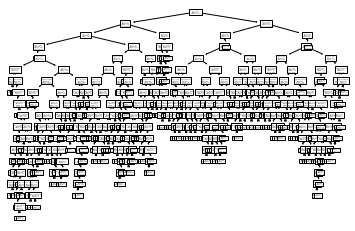

In [73]:
from sklearn import tree
tree.plot_tree(model)

In [74]:
print(df.groupby(['IsActiveMember'])['Balance'].value_counts(normalize=True))

IsActiveMember  Balance  
0.0             0.00         0.359478
                3768.69      0.000207
                12459.19     0.000207
                14262.80     0.000207
                27755.97     0.000207
                               ...   
1.0             212314.03    0.000195
                212778.20    0.000195
                216109.88    0.000195
                238387.56    0.000195
                250898.09    0.000195
Name: Balance, Length: 6361, dtype: float64


In [75]:
df[(df['Balance']==0) & (df['IsActiveMember']==0)].count()

CreditScore             1737
Geography               1737
Gender                  1737
Age                     1737
CurrentWorkingStatus    1737
Tenure                  1737
Balance                 1737
NumOfProducts           1737
ComplaintsLodged        1737
HasCrCard               1737
IsActiveMember          1737
EstimatedSalary         1737
Exited                  1737
dtype: int64

In [76]:
df[(df['Balance']==0) & (df['IsActiveMember']==1)].count()

CreditScore             1867
Geography               1867
Gender                  1867
Age                     1867
CurrentWorkingStatus    1867
Tenure                  1867
Balance                 1867
NumOfProducts           1867
ComplaintsLodged        1867
HasCrCard               1867
IsActiveMember          1867
EstimatedSalary         1867
Exited                  1867
dtype: int64

In [77]:
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("DefaultModel.png")

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
 'max_depth': range(2, 10),
 'min_samples_leaf': range(20, 60, 2)}
cv = GridSearchCV(param_grid=params, estimator=
 DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9691712073415544
Test accuracy: 0.9722315155570425
              precision    recall  f1-score   support

          No       0.98      0.99      0.98      2379
         Yes       0.94      0.92      0.93       610

    accuracy                           0.97      2989
   macro avg       0.96      0.95      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 22}


In [82]:
model = DecisionTreeClassifier(criterion='gini', max_depth= 5, min_samples_leaf=22)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=22)

In [83]:
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("op.png")

In [84]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])


ComplaintsLodged : 0.9660870236608868
Age : 0.01513679706156005
NumOfProducts : 0.011635267543333576
Balance : 0.004126485010094091
Gender : 0.0013805476166024319
IsActiveMember : 0.0012654820276961037
CreditScore : 0.0003683970798268774
CurrentWorkingStatus : 0.0
Tenure : 0.0
Geography_Spain : 0.0
Geography_Germany : 0.0
EstimatedSalary : 0.0
Geography_DE : 0.0
Geography_ES : 0.0
Geography_FR : 0.0
Geography_France : 0.0
HasCrCard : 0.0


In [85]:
from sklearn.preprocessing import StandardScaler
# initialise a standard scaler object
scaler = StandardScaler()
# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
 col = X_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))
# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)
print("After scaling\n-------------")
for i in range(5):
 col = X_train[:,i]
 print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
 format(i, min(col), max(col), np.mean(col), np.std(col)))
# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 350.0, max 850.0, mean 650.44 and std dev 96.11
Variable #1: min 0.0, max 1.0, mean 0.55 and std dev 0.50
Variable #2: min 18.0, max 92.0, mean 38.85 and std dev 10.49
Variable #3: min 0.0, max 1.0, mean 1.00 and std dev 0.06
Variable #4: min 0.0, max 10.0, mean 5.04 and std dev 2.89
After scaling
-------------
Variable #0: min -3.1260189589361795, max 2.076371426378983, mean -0.00 and std dev 1.00
Variable #1: min -1.1056376765312104, max 0.9044554298631223, mean -0.00 and std dev 1.00
Variable #2: min -1.9883045937658257, max 5.067595864253684, mean -0.00 and std dev 1.00
Variable #3: min -17.38440080371839, max 0.05752283390670684, mean -0.00 and std dev 1.00
Variable #4: min -1.7427614891318617, max 1.7183441678921738, mean -0.00 and std dev 1.00


In [86]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=rs)
# fit it to training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [87]:
# training and test accuracy
print("Train accuracy:", logistic_model.score(X_train, y_train))
print("Test accuracy:", logistic_model.score(X_test, y_test))
# classification report on test data
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9677373100086034
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989



In [88]:
feature_names = X.columns
coef = logistic_model.coef_[0]
# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]
for i in range(len(coef)):
 print(feature_names[i], ':', coef[i])

CreditScore : -0.0018509358041468094
Gender : -0.3555681781575298
Age : 0.6837300482879215
CurrentWorkingStatus : 0.01002971213011895
Tenure : 0.01636790940082509
Balance : 0.02632952849827076
NumOfProducts : -0.061186300501260824
ComplaintsLodged : 2.576336255297869
HasCrCard : -0.08524543393422541
IsActiveMember : -0.44567271838916506
EstimatedSalary : -0.016882169603975206
Geography_DE : 0.08761468776645516
Geography_ES : 0.008936034408130799
Geography_FR : -0.05103157440430956
Geography_France : -0.12170801394442829
Geography_Germany : 0.24029390640557655
Geography_Spain : -0.1018946349781937


In [89]:
# grab feature importances from the model and feature name from the original X
coef = logistic_model.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', coef[i])

ComplaintsLodged : 2.576336255297869
Age : 0.6837300482879215
IsActiveMember : -0.44567271838916506
Gender : -0.3555681781575298
Geography_Germany : 0.24029390640557655
Geography_France : -0.12170801394442829
Geography_Spain : -0.1018946349781937
Geography_DE : 0.08761468776645516
HasCrCard : -0.08524543393422541
NumOfProducts : -0.061186300501260824
Geography_FR : -0.05103157440430956
Balance : 0.02632952849827076
EstimatedSalary : -0.016882169603975206
Tenure : 0.01636790940082509
CurrentWorkingStatus : 0.01002971213011895
Geography_ES : 0.008936034408130799
CreditScore : -0.0018509358041468094


In [90]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9675939202753083
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'C': 0.1}


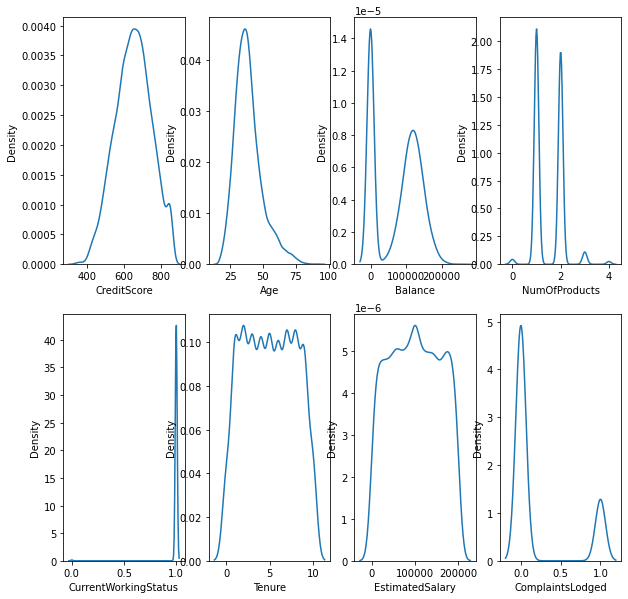

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_skewed_columns(df):
 # setting up subplots for easier visualisation
 f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)
 # gift avg plots
 sns.distplot(df['CreditScore'].dropna(), hist=False, ax=axes[0,0])
 sns.distplot(df['Age'].dropna(), hist=False, ax=axes[0,1])
 sns.distplot(df['CurrentWorkingStatus'].dropna(), hist=False, ax=axes[1,0])
 sns.distplot(df['Tenure'].dropna(), hist=False, ax=axes[1,1])
 # gift cnt plots
 sns.distplot(df['Balance'].dropna(), hist=False, ax=axes[0,2])
 sns.distplot(df['NumOfProducts'].dropna(), hist=False, ax=axes[0,3])
 sns.distplot(df['EstimatedSalary'].dropna(), hist=False, ax=axes[1,2])
 sns.distplot(df['ComplaintsLodged'].dropna(), hist=False, ax=axes[1,3])
 plt.show()

plot_skewed_columns(df)

In [92]:
df

CreditScore Geography  Gender   Age  CurrentWorkingStatus  Tenure  \
0           619.0    France  Female  42.0                   1.0     2.0   
1           608.0     Spain  Female  41.0                   1.0     1.0   
2           502.0    France  Female  42.0                   1.0     8.0   
3           699.0    France  Female  39.0                   1.0     1.0   
4           850.0     Spain  Female  43.0                   1.0     2.0   
...           ...       ...     ...   ...                   ...     ...   
9995        771.0    France    Male  39.0                   1.0     5.0   
9996        516.0    France    Male  35.0                   1.0    10.0   
9997        709.0    France  Female  36.0                   1.0     7.0   
9998        772.0   Germany    Male  42.0                   1.0     3.0   
9999        792.0    France  Female  28.0                   1.0     4.0   

        Balance  NumOfProducts  ComplaintsLodged  HasCrCard  IsActiveMember  \
0          0.00            1.0               1.0        1.0             1.0   
1      83807.86            1.0               0.0        0.0             1.0   
2     159660.80            3.0               1.0        1.0             0.0   
3          0.00            2.0               0.0        0.0             0.0   
4     125510.82            1.0               0.0        1.0             1.0   
...         ...            ...               ...        ...             ...   
9995       0.00            2.0               0.0        1.0             0.0   
9996   57369.61            1.0               0.0        1.0             1.0   
9997       0.00            1.0               1.0        0.0             1.0   
9998   75075.31            2.0               1.0        1.0             0.0   
9999  130142.79            1.0               0.0        1.0             0.0   

      EstimatedSalary Exited  
0       101348.880000    Yes  
1       112542.580000     No  
2       113931.570000    Yes  
3       100198.151107     No  
4        79084.100000     No  
...               ...    ...  
9995     96270.640000     No  
9996    101699.770000     No  
9997     42085.580000    Yes  
9998     92888.520000    Yes  
9999     38190.780000     No  

[9963 rows x 13 columns]

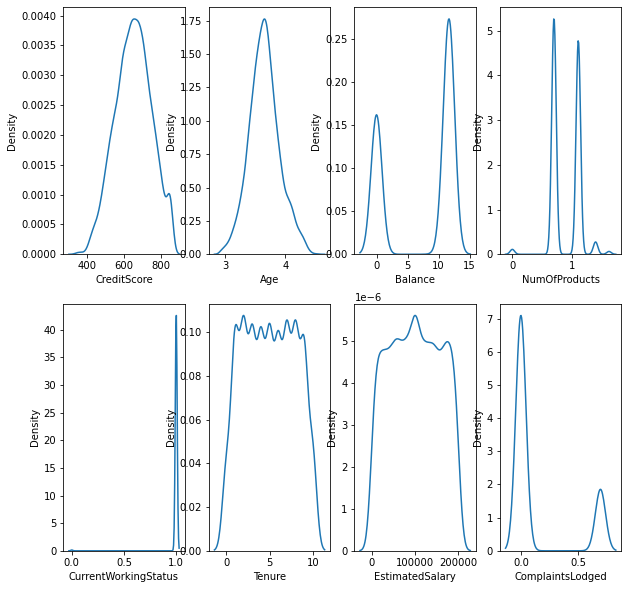

In [93]:
import numpy as np
# list columns to be transformed
columns_to_transform = ['Age', 'Balance', 'NumOfProducts', 'ComplaintsLodged']
# copy the dataframe
df_log = df.copy()
# transform the columns with np.log
for col in columns_to_transform:
 df_log[col] = df_log[col].apply(lambda x: x+1)
 df_log[col] = df_log[col].apply(np.log)
# plot them again to show the distribution
plot_skewed_columns(df_log)

In [94]:
# create X, y and train test data partitions
y_log = df_log['Exited']
X_log = df_log.drop(['Exited'], axis=1)
gender_map = {'Female':0, 'Male': 1}
X_log['Gender'] = X_log['Gender'].map(gender_map)
X_log = pd.get_dummies(X_log)
X_mat_log = X_log.values
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log,
 y_log,
test_size=0.3,
stratify=y_log,
random_state=rs)
# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)


In [95]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)
# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))
y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9675939202753083
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'C': 0.01}


In [96]:
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10,min_features_to_select=10)
rfe.fit(X_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 17
Number of features after elimination 10


In [97]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [98]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train)
# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))
y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))
# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.9677373100086034
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'C': 0.1}


In [99]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset
# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)
# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)
# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=
 LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)
# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))
y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))
# print parameters of the best model
print(cv.best_params_)

Original feature set 17
Number of features after elimination 1
Train accuracy: 0.9677373100086034
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'C': 0.001}


In [100]:
from sklearn.neural_network import MLPClassifier

In [101]:
model = MLPClassifier(random_state=rs)
model.fit(X_train, y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model)

Train accuracy: 0.9767708632061944
Test accuracy: 0.9705587152893944
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.92      0.93       610

    accuracy                           0.97      2989
   macro avg       0.96      0.95      0.95      2989
weighted avg       0.97      0.97      0.97      2989

MLPClassifier(random_state=10)


In [102]:
model = MLPClassifier(max_iter=100, random_state=rs)
model.fit(X_train, y_train)
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(model)

Train accuracy: 0.9726125609406366
Test accuracy: 0.9739043158246905
              precision    recall  f1-score   support

          No       0.98      0.99      0.98      2379
         Yes       0.95      0.92      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

MLPClassifier(max_iter=100, random_state=10)


In [103]:
print(X_train.shape)

(6974, 17)


In [104]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 18, 20)]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.9675939202753083
Test accuracy: 0.9732351957176313
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.93       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'hidden_layer_sizes': (5,)}


In [105]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.968741038141669
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.93       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'hidden_layer_sizes': (7,)}


In [106]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv.best_params_)

Train accuracy: 0.968741038141669
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.93       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'alpha': 0.0001, 'hidden_layer_sizes': (7,)}


In [107]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))
y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))
print(cv.best_params_)

Train accuracy: 0.967163751075423
Test accuracy: 0.9725660756105721
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.93       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'alpha': 0.01, 'hidden_layer_sizes': (5,)}


In [108]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log)
print(rfe.n_features_)

1


In [109]:
# transform log
X_train_rfe = rfe.transform(X_train_log)
X_test_rfe = rfe.transform(X_test_log)
# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)],
 'alpha': [0.01,0.001, 0.0001, 0.00001]}
cv = GridSearchCV(param_grid=params, estimator=
 MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_rfe, y_train_log)
print("Train accuracy:", cv.score(X_train_rfe, y_train_log))
print("Test accuracy:", cv.score(X_test_rfe, y_test_log))
y_pred = cv.predict(X_test_rfe)
print(classification_report(y_test_log, y_pred))
print(cv.best_params_)

Train accuracy: 0.9677373100086034
Test accuracy: 0.9735697557711609
              precision    recall  f1-score   support

          No       0.98      0.98      0.98      2379
         Yes       0.94      0.93      0.94       610

    accuracy                           0.97      2989
   macro avg       0.96      0.96      0.96      2989
weighted avg       0.97      0.97      0.97      2989

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


In [110]:
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

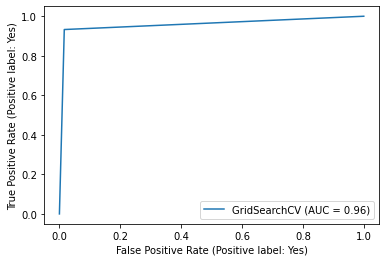

In [111]:
plot_roc_curve(cv, X_test_rfe, y_test_log)